In [50]:
import petl as etl
import random

table = etl.fromcsv('results_preprocessed.csv')

# Select specific columns
selected_table = etl.cut(table, 'Coding_as_Hobby', 'Immigration_Plans', 'English_Barrier', 'Age')
etl.look(selected_table)

+-----------------+-------------------+-----------------+------------------+
| Coding_as_Hobby | Immigration_Plans | English_Barrier | Age              |
+=================+===================+=================+==================+
| 'Yes'           | 'Yes'             | 'No'            | '20 to 24 years' |
+-----------------+-------------------+-----------------+------------------+
| 'Yes'           | 'Yes'             | 'Yes'           | '20 to 24 years' |
+-----------------+-------------------+-----------------+------------------+
| 'Yes'           | 'No'              | 'No'            | '20 to 24 years' |
+-----------------+-------------------+-----------------+------------------+
| 'Yes'           | 'Yes'             | 'No'            | '20 to 24 years' |
+-----------------+-------------------+-----------------+------------------+
| 'Yes'           | 'No'              | 'No'            | '20 to 24 years' |
+-----------------+-------------------+-----------------+------------------+

In [51]:
# conversion function to the relevant columns
columns_to_convert = ['Coding_as_Hobby', 'Immigration_Plans', 'English_Barrier']
converted_table = etl.convert(selected_table, columns_to_convert, lambda columns_to_convert: columns_to_convert == 'Yes')

# map age ranges to synthetic ages
def map_age_range_to_synthetic_age(age_range):
    if '20 to 24' in age_range:
        return random.randint(20, 24)
    elif '25 to 29' in age_range:
        return random.randint(25, 29)
    elif '30 to 34' in age_range:
        return random.randint(30, 34)
    elif '15 to 19' in age_range:
        return random.randint(15, 19)
    elif '35 to 39' in age_range:
        return random.randint(35, 39)
    elif '40 years and older' in age_range:
        return random.randint(40, 70)  
    elif 'Younger than 15' in age_range:
        return random.randint(10, 14)  
    else:
        return None  

synthetic_ages = []

for age_range in converted_table['Age']:
    synthetic_ages.append(map_age_range_to_synthetic_age(age_range))


converted_table = etl.addcolumn(converted_table, 'Synthetic_Age', synthetic_ages)

etl.tocsv(converted_table, 'ETL_data.csv')

etl.look(converted_table)

+-----------------+-------------------+-----------------+------------------+---------------+
| Coding_as_Hobby | Immigration_Plans | English_Barrier | Age              | Synthetic_Age |
+=================+===================+=================+==================+===============+
| True            | True              | False           | '20 to 24 years' |            23 |
+-----------------+-------------------+-----------------+------------------+---------------+
| True            | True              | True            | '20 to 24 years' |            22 |
+-----------------+-------------------+-----------------+------------------+---------------+
| True            | False             | False           | '20 to 24 years' |            22 |
+-----------------+-------------------+-----------------+------------------+---------------+
| True            | True              | False           | '20 to 24 years' |            23 |
+-----------------+-------------------+-----------------+-------------

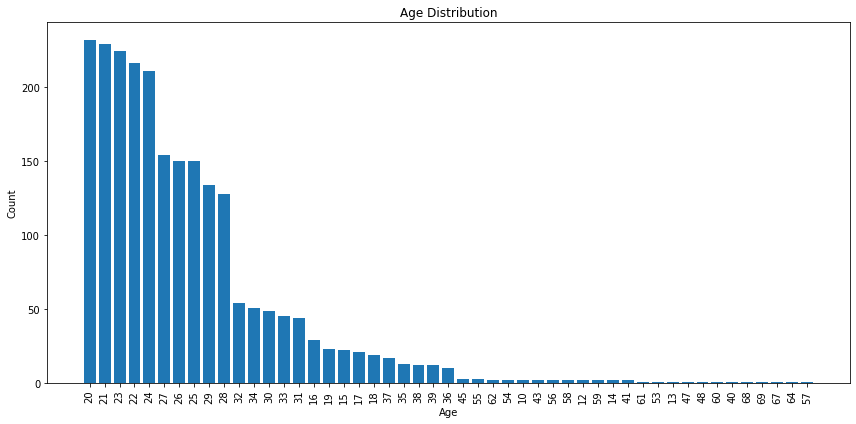

In [47]:
import matplotlib.pyplot as plt

value_counts = etl.valuecounts(converted_table, 'Synthetic_Age')

# Extract ages and counts from value counts
ages = [str(item[0]) for item in value_counts]
counts = [item[1] for item in value_counts]

ages, counts = ages[1:], counts[1:]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(ages, counts)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [ ]:
!pip install pandas-gbq

In [33]:
import pandas as pd
from pandas_gbq import to_gbq
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "your-credentials.json file"

df = pd.read_csv('ETL_data.csv')

# auth
project_id = 'your project id'
dataset_id = 'mydata'
table_id = 'ETL'

destination_table = f'{project_id}.{dataset_id}.{table_id}'

# Upload the data from the DataFrame to the specified BigQuery table
to_gbq(df, destination_table, if_exists='replace')


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2692.11it/s]
